In [1]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

1. Data Import, EDA, Transformation and Feature Engineering

In [3]:
# data import
df = pd.read_csv('hubway_trips.csv')
stations = pd.read_csv('hubway_stations.csv')
weather =  pd.read_csv('weather.csv')

In [4]:
# quick check
df.head(3)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male


In [5]:
stations.head(3)

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing


In [6]:
weather.head(3)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement_Flag,Quality_Flag
0,COOP:190770,BOSTON MA US,3.7,42.3606,-71.0106,20110729 09:00,0.0,T,
1,COOP:190770,BOSTON MA US,3.7,42.3606,-71.0106,20110729 10:00,0.0,T,
2,COOP:190770,BOSTON MA US,3.7,42.3606,-71.0106,20110729 18:00,0.0,T,


In [7]:
# checking shape of data, count value of data types
print(df.shape)
print(stations.shape)
print(weather.shape)

print(df.dtypes.value_counts())
print(stations.dtypes.value_counts())
print(weather.dtypes.value_counts())

(1579025, 13)
(142, 7)
(2654, 9)
object     7
int64      3
float64    3
dtype: int64
object     4
float64    2
int64      1
dtype: int64
object     5
float64    4
dtype: int64


In [8]:
# checking datatype of the main trip dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   seq_id      1579025 non-null  int64  
 1   hubway_id   1579025 non-null  int64  
 2   status      1579025 non-null  object 
 3   duration    1579025 non-null  int64  
 4   start_date  1579025 non-null  object 
 5   strt_statn  1579011 non-null  float64
 6   end_date    1579025 non-null  object 
 7   end_statn   1578980 non-null  float64
 8   bike_nr     1578559 non-null  object 
 9   subsc_type  1579025 non-null  object 
 10  zip_code    1106259 non-null  object 
 11  birth_date  350644 non-null   float64
 12  gender      1106414 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 156.6+ MB


In [9]:
df.describe()

,seq_id,hubway_id,duration,strt_statn,end_statn,birth_date
count,1.579025e+06,1.579025e+06,1.579025e+06,1.579011e+06,1.578980e+06,350644.000000
mean,7.895130e+05,8.865317e+05,1.200280e+03,5.438039e+01,5.425603e+01,1976.295322
std,4.558254e+05,5.064783e+05,2.653539e+04,3.364295e+01,3.347219e+01,10.999742
min,1.000000e+00,8.000000e+00,-6.900000e+03,3.000000e+00,3.000000e+00,1932.000000
25%,3.947570e+05,4.465250e+05,4.120000e+02,2.700000e+01,2.900000e+01,1969.000000
50%,7.895130e+05,8.950440e+05,6.600000e+02,4.800000e+01,4.800000e+01,1979.000000
75%,1.184269e+06,1.328083e+06,1.082000e+03,7.400000e+01,7.400000e+01,1985.000000
max,1.579025e+06,1.748022e+06,1.199446e+07,1.450000e+02,1.450000e+02,1995.000000


In [10]:
weather.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,2.654000e+03,2.654000e+03,2.654000e+03,2654.000000
mean,3.700000e+00,4.236060e+01,-7.101060e+01,0.032946
std,4.441729e-16,7.106766e-15,1.421353e-14,0.074943
min,3.700000e+00,4.236060e+01,-7.101060e+01,0.000000
25%,3.700000e+00,4.236060e+01,-7.101060e+01,0.000000
50%,3.700000e+00,4.236060e+01,-7.101060e+01,0.010000
75%,3.700000e+00,4.236060e+01,-7.101060e+01,0.030000
max,3.700000e+00,4.236060e+01,-7.101060e+01,1.330000


In [11]:
df.isnull().sum()

seq_id              0
hubway_id           0
status              0
duration            0
start_date          0
strt_statn         14
end_date            0
end_statn          45
bike_nr           466
subsc_type          0
zip_code       472766
birth_date    1228381
gender         472611
dtype: int64

In [12]:
stations.isnull().sum()

id           0
terminal     0
station      0
municipal    0
lat          0
lng          0
status       0
dtype: int64

In [13]:
weather.isnull().sum()

STATION             0
STATION_NAME        0
ELEVATION           0
LATITUDE            0
LONGITUDE           0
DATE                0
HPCP                0
Measurement_Flag    0
Quality_Flag        0
dtype: int64

In [14]:
# we join up the trip data with the stations and weather data, calculate some useful metrics e.g distance 
df2 = pd.merge(df , stations , left_on='strt_statn' , right_on='id', how = 'left')
df3 = pd.merge(df2 , stations , left_on='end_statn' , right_on='id', how = 'left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579025 entries, 0 to 1579024
Data columns (total 27 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   seq_id       1579025 non-null  int64  
 1   hubway_id    1579025 non-null  int64  
 2   status_x     1579025 non-null  object 
 3   duration     1579025 non-null  int64  
 4   start_date   1579025 non-null  object 
 5   strt_statn   1579011 non-null  float64
 6   end_date     1579025 non-null  object 
 7   end_statn    1578980 non-null  float64
 8   bike_nr      1578559 non-null  object 
 9   subsc_type   1579025 non-null  object 
 10  zip_code     1106259 non-null  object 
 11  birth_date   350644 non-null   float64
 12  gender       1106414 non-null  object 
 13  id_x         1579011 non-null  float64
 14  terminal_x   1579011 non-null  object 
 15  station_x    1579011 non-null  object 
 16  municipal_x  1579011 non-null  object 
 17  lat_x        1579011 non-null  float64
 18  ln

In [16]:
# date engineering -I           engineering dates
def time_rounder(t):
    return t.replace(second=0, minute=0)
df3['start_date'] = df3['start_date'].apply(lambda x:  datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))
df3['start_date_nearest']=  df3['start_date'].apply(lambda x :time_rounder(x))
weather['DATE'] = weather['DATE'].apply(lambda x:  datetime.strptime(x, '%Y%m%d %H:%M'))
weather= weather[['DATE','HPCP']]

In [17]:
df4 = pd.merge(df3 , weather , left_on='start_date_nearest' , right_on='DATE', how = 'left')
df4['HPCP'] = df4['HPCP'].fillna(0)  # since from the data description PDF i learned Hours with no precipitation are not shown.

In [18]:
# date engineering -II               engineering nulls and create the subscriptionagebandgender col 

df4= df4[((df['subsc_type']=='Registered') & (df['birth_date'].notnull())) | (df['subsc_type']=='Casual')]

In [19]:
# i had a look at df4['age'].hist() to understand the age distribution and made the below categorization
def age_band(x):
    if np.isnan(x):
        return ''
    if x< 25:
        return 'under 25'
    if x< 30:
        return '25-30'
    if x< 35:
        return '30-35'
    if x< 40:
        return '35-40'
    if x< 50:
        return '40-50'
    return '50+'
df4['gender'] = df4['gender'].fillna('')
df4['age'] =   df4['start_date_nearest'].apply(lambda x : x.year)- df['birth_date'] 
df4['age_band'] =  df4['age'].apply(lambda x : age_band(x))
df4['subscriptionagebandgender'] = df4['subsc_type'] +' '+ df4['age_band'] + ' ' + df4['gender']

# comments: the composite feature is great because we do not have to drop null birth_year/gender resulting in dramatic decrease in data size
# _dropping null birth_year/gender will also result in casual subscription type to be dropped and will only net 350k data point
# _with this composibte feature we have preserved most of the observations

In [20]:
df4 = df4[df4['bike_nr'].notnull()]
df4 = df4[df4['id_x'].notnull()]
df4 = df4[df4['id_y'].notnull()]

In [21]:
df4['subscriptionagebandgender'].value_counts()

Casual                        472341
Registered 25-30 Male          63855
Registered 40-50 Male          48751
Registered 30-35 Male          46592
Registered 50+ Male            39043
Registered 35-40 Male          32710
Registered under 25 Male       32482
Registered 25-30 Female        23340
Registered 30-35 Female        16585
Registered under 25 Female     14135
Registered 40-50 Female        12038
Registered 50+ Female          10562
Registered 35-40 Female        10310
Name: subscriptionagebandgender, dtype: int64

In [34]:
# getting distance in meters;
import math
def distance_calculator(x1,y1,x2,y2):
    return math.sqrt(  abs(x2-x1)**2+abs(y2-y1)**2 )
distance=[]
lat_x = list(df4['lat_x'])  #x1
lng_x = list(df4['lng_x'])  #y1
lat_y = list(df4['lat_y'])
lng_y = list(df4['lng_y'])
for i in range(0, len(lat_x)):
    distance.append(  distance_calculator(lat_x[i],lng_x[i],lat_y[i],lng_y[i])          )  
df4['distance'] = distance

In [38]:
# i dropped the columns which i believe will not longer be used, or have their values made into the various combined features
df5 = df4.drop(['seq_id','hubway_id','status_x','start_date','strt_statn','end_date','end_statn',
    'subsc_type','zip_code' ,'birth_date'  ,'gender'  ,'id_x' ,'terminal_x','station_x',
     'lat_x','lng_x' ,'status_y' ,'id_y'  ,'terminal_y','station_y' ,'lat_y'  ,'lng_y' ,'status' ,
                 'DATE' ,'age_band' ,'age' ,'municipal_x' ,'municipal_y' ,'bike_nr'
          ], axis = 1)

In [39]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822744 entries, 0 to 1579022
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   duration                   822744 non-null  int64         
 1   start_date_nearest         822744 non-null  datetime64[ns]
 2   HPCP                       822744 non-null  float64       
 3   subscriptionagebandgender  822744 non-null  object        
 4   distance                   822744 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 37.7+ MB


2. Visualized EDA and additional feature engineering

In [41]:
# by now the data is already looking very neat with the dependent variables and independent numerical/cat variables
# I want to know if additional features can be had through the chronological data

In [42]:
df5.head(3)

,duration,start_date_nearest,HPCP,subscriptionagebandgender,distance
0,9,2011-07-28 10:00:00,0.0,Registered 35-40 Male,0.0
1,220,2011-07-28 10:00:00,0.0,Registered 40-50 Male,0.0
2,56,2011-07-28 10:00:00,0.0,Registered 50+ Male,0.0


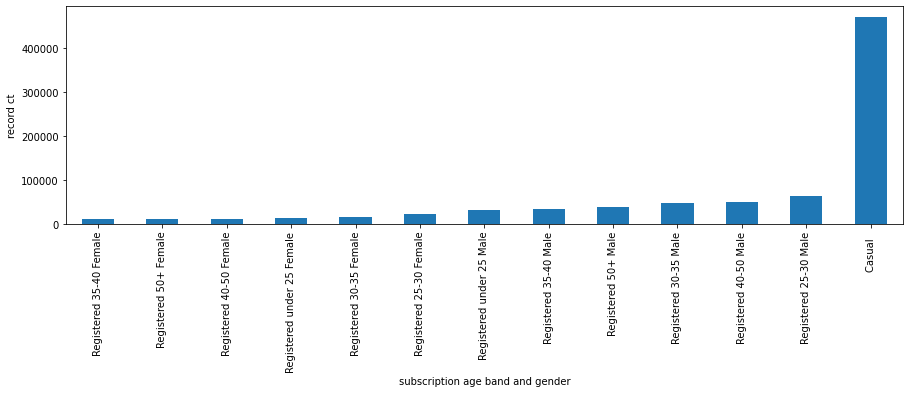

In [71]:
fig = plt.figure(figsize=(15,4))
ax = df5.groupby(by=['subscriptionagebandgender'])['subscriptionagebandgender'].count().sort_values().plot(x='subscriptionagebandgender',
                                                                                    y='ct',
                                                                                kind='bar'    )
plt.xlabel("subscription age band and gender")
plt.ylabel("record ct")
plt.savefig('subscriptionagebandgender categorical ct.png')
plt.show()